In [21]:
# Third-party imports 
import numpy as np
import matplotlib.pyplot as plt 
from astropy import units as u 
  

# Project import
import artpop

# artpop's matplotlib style
plt.style.use(artpop.mpl_style)

# use this random state for reproducibility
rng = np.random.RandomState(112)

# setup for ages, photometric system, and etc.
imf = 'kroupa'  # initial mass function
phot_system = 'UBVRIplus'
log_ages_grid = artpop.MISTIsochrone._log_age_grid[60:-3:4]
feh_grid = [-1.5]

print(artpop.filters.get_filter_names('UBVRIplus'))
print(log_ages_grid)

['Bessell_U', 'Bessell_B', 'Bessell_V', 'Bessell_R', 'Bessell_I', '2MASS_J', '2MASS_H', '2MASS_Ks', 'Kepler_Kp', 'Kepler_D51', 'Hipparcos_Hp', 'Tycho_B', 'Tycho_V', 'Gaia_G_DR2Rev', 'Gaia_BP_DR2Rev', 'Gaia_RP_DR2Rev', 'Gaia_G_MAW', 'Gaia_BP_MAWb', 'Gaia_BP_MAWf', 'Gaia_RP_MAW', 'TESS']
[ 8.   8.2  8.4  8.6  8.8  9.   9.2  9.4  9.6  9.8 10. ]


We then use the make composite stellar population using 3 SSPs:

In [22]:
RGB_metal = []
AGB_metal = []
I_AGB = [] 
B_AGB = []
V_AGB = []
H_AGB = []
J_AGB = []
K_AGB = []
I_RGB = []
B_RGB = []
V_RGB = []
H_RGB = []
J_RGB = []
K_RGB = []
I_PAGB = []
B_PAGB = []
V_PAGB = []
H_PAGB = []
J_PAGB = []
K_PAGB = []

I_AGB_young = [] 
B_AGB_young = []
V_AGB_young = []
H_AGB_young = []
J_AGB_young = []
K_AGB_young = []
I_RGB_young = []
B_RGB_young = []
V_RGB_young = []
H_RGB_young = []
J_RGB_young = []
K_RGB_young = []
I_PAGB_young = []
B_PAGB_young = []
V_PAGB_young = []
H_PAGB_young = []
J_PAGB_young = []
K_PAGB_young = []

I_AGB_old = [] 
B_AGB_old = []
V_AGB_old = []
H_AGB_old = []
J_AGB_old = []
K_AGB_old = []
I_RGB_old = []
B_RGB_old = []
V_RGB_old = []
H_RGB_old = []
J_RGB_old = []
K_RGB_old = []
I_PAGB_old = []
B_PAGB_old = []
V_PAGB_old = []
H_PAGB_old = []
J_PAGB_old = []
K_PAGB_old = []


for log_age in log_ages_grid:
    ssp = artpop.MISTSSP(
        log_age = log_age,        # log of age in years
        feh = -1.5,             # metallicity [Fe/H]
        phot_system = phot_system, # photometric system(s)
        num_stars = 1e10,      # number of stars
        random_state = rng,   # random state for reproducibility
        ab_or_vega = 'vega',   # Vega mag system
        imf = 'kroupa',
        mag_limit = -2,
        mag_limit_band = 'Bessell_V'
    )
    ssp_2 = artpop.MISTSSP(
        log_age = log_age,        # log of age in years
        feh = -1.5,             # metallicity [Fe/H]
        phot_system = phot_system, # photometric system(s)
        num_stars = 1e6,      # number of stars
        random_state = rng,   # random state for reproducibility
        ab_or_vega = 'vega',   # Vega mag system
        imf = 'kroupa',
    )
    RGB = ssp_2.select_phase('RGB')
    AGB = ssp_2.select_phase('AGB')
    PAGB = ssp.select_phase('postAGB')
    # ssps_metal.append(ssp)
    I_AGB.append(ssp.star_mags('Bessell_I')[AGB])
    B_AGB.append(ssp.star_mags('Bessell_B')[AGB])
    V_AGB.append(ssp.star_mags('Bessell_V')[AGB])
    H_AGB.append(ssp.star_mags('2MASS_H')[AGB])
    J_AGB.append(ssp.star_mags('2MASS_J')[AGB])
    K_AGB.append(ssp.star_mags('2MASS_Ks')[AGB])
    I_RGB.append(ssp.star_mags('Bessell_I')[RGB])
    B_RGB.append(ssp.star_mags('Bessell_B')[RGB])
    V_RGB.append(ssp.star_mags('Bessell_V')[RGB])
    H_RGB.append(ssp.star_mags('2MASS_H')[RGB])
    J_RGB.append(ssp.star_mags('2MASS_J')[RGB])
    K_RGB.append(ssp.star_mags('2MASS_Ks')[RGB])
    I_PAGB.append(ssp.star_mags('Bessell_I')[PAGB])
    B_PAGB.append(ssp.star_mags('Bessell_B')[PAGB])
    V_PAGB.append(ssp.star_mags('Bessell_V')[PAGB])
    H_PAGB.append(ssp.star_mags('2MASS_H')[PAGB])
    J_PAGB.append(ssp.star_mags('2MASS_J')[PAGB])
    K_PAGB.append(ssp.star_mags('2MASS_Ks')[PAGB])





We now try to find the Center of the AGB with J-K vs J:

249941


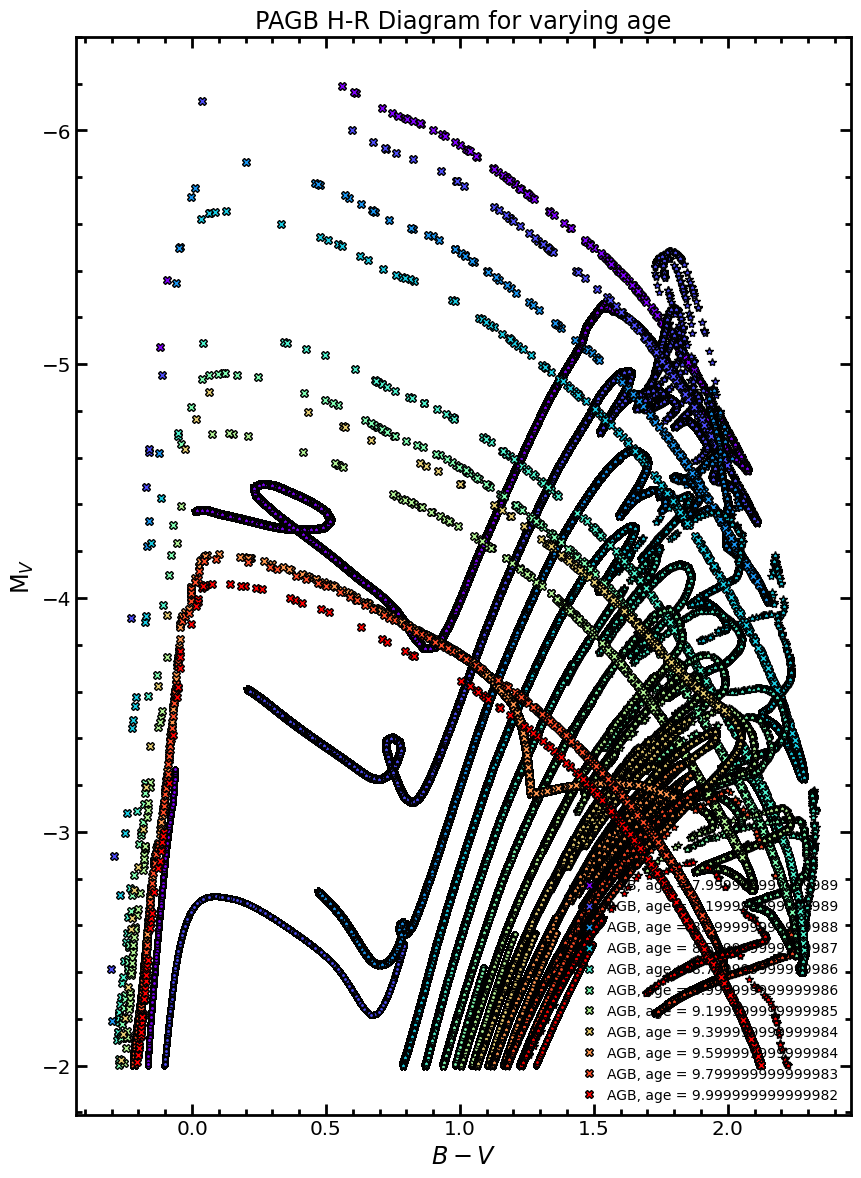

In [25]:
# plot J-K - J for AGB
from matplotlib import cm

plt.figure(figsize=(10, 14), dpi=100)
colors = cm.rainbow(np.linspace(0, 1, len(log_ages_grid)))

print(len(ssp.star_mags('Bessell_B')))

for i in range(len(log_ages_grid)):
    this_label = "AGB, age = "+ str(log_ages_grid[i])
    plt.plot(B_AGB[i] - V_AGB[i], V_AGB[i], '*', c = colors[i], mec='k')
    plt.plot(B_PAGB[i] - V_PAGB[i], V_PAGB[i], 'X', c = colors[i], mec='k', label = this_label)
    plt.plot(B_RGB[i] - V_RGB[i], V_RGB[i], '.', c = colors[i], mec='k')
    # plt.plot(ssp.star_mags('Bessell_B') - ssp.star_mags('Bessell_V'), ssp.star_mags('Bessell_V'),  c = colors[i], mec='k')




# plt.xlim(0.5,2)
# plt.ylim(-9,-3)
plt.legend(loc=4, prop={'size': 10})
plt.minorticks_on()
plt.gca().invert_yaxis()
plt.xlabel(r'$B-V$')
plt.ylabel(r'M$_V$')
plt.title("PAGB H-R Diagram for varying age");


In [24]:

mags = []
for i in range(len(log_ages_grid)):
    B_V = np.subtract(B_PAGB[i], V_PAGB[i])
    V = V_PAGB[i]
    color_cut = np.all([B_V>0.5, B_V<3], axis=0)
    mag_cut = np.all([V>-4,V<-2], axis=0) 
    all_cut = np.all([color_cut,mag_cut], axis=0)
    # print(V[all_cut])
    # print(all_cut)
    mags = np.concatenate((mags, V[all_cut]))
    
print('Averaged mag of yPAGB on V band =', np.average(mags))



Averaged mag of yPAGB on V band = -3.156422999086595
